<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/Reagan/preReaganInflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
start, end = dt.datetime(1950, 1, 1), dt.datetime(1981, 1, 1)

# CPI (monthly index)
cpi = web.DataReader("CPIAUCSL", "fred", start, end)

# YoY inflation (%)
inflation = cpi.pct_change(12) * 100
inflation = inflation.dropna()

print(inflation.head())

            CPIAUCSL
DATE                
1951-01-01  7.954062
1951-02-01  9.402795
1951-03-01  9.475465
1951-04-01  9.598309
1951-05-01  9.339504


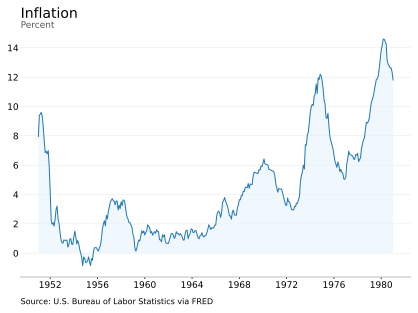

In [4]:
x, y = inflation.index, inflation['CPIAUCSL']

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Inflation', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Labor Statistics via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)


fig.savefig("pre_reagan_inflation.png", bbox_inches="tight", dpi=300)
plt.show()